[*********************100%***********************]  1 of 1 completed


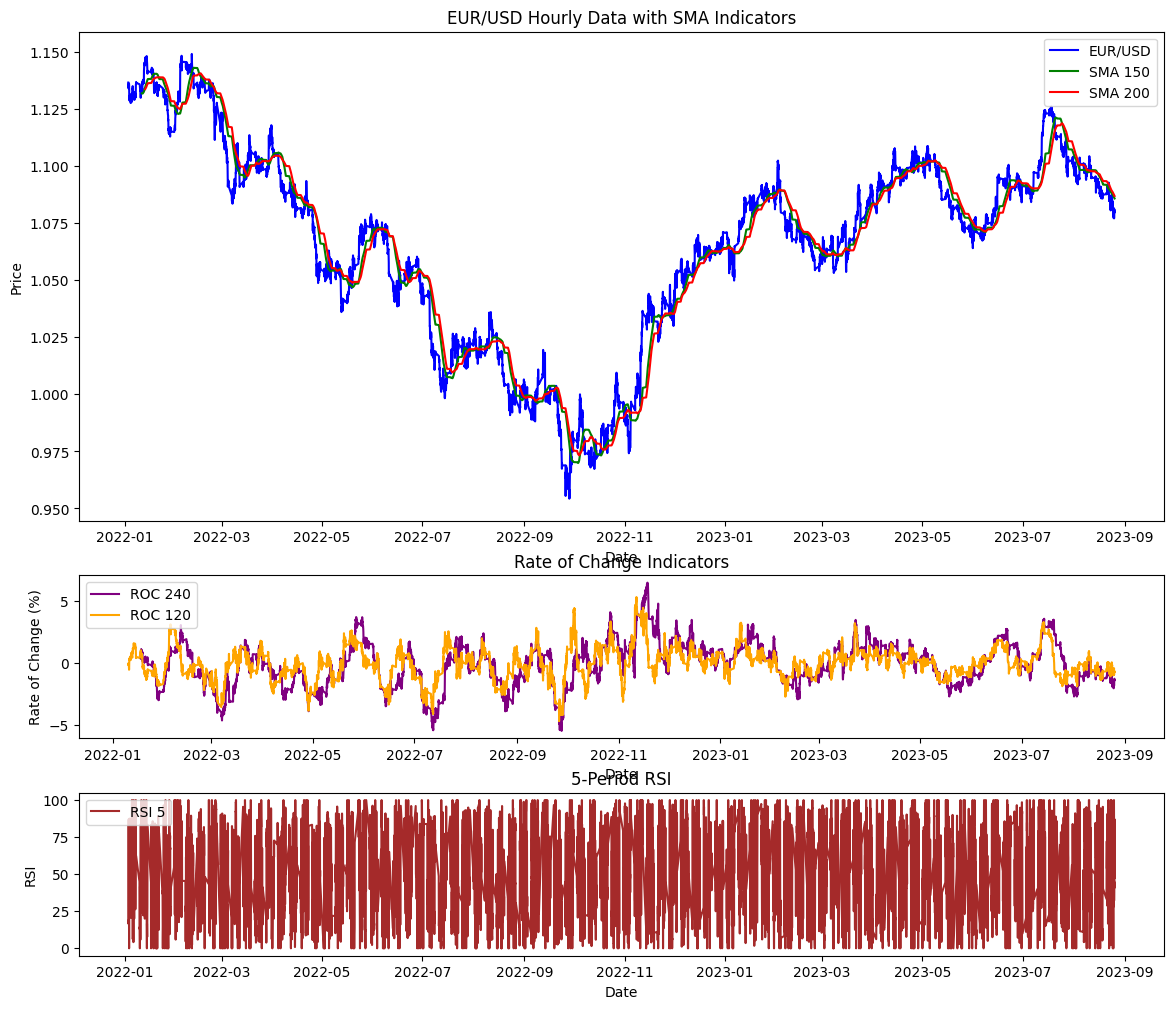

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Fetch EUR/USD hourly data from Yahoo Finance
symbol = "EURUSD=X"
start_date = "2022-01-01"
end_date = "2023-08-27"  # You can adjust this to the current date
interval = "1h"

data = yf.download(symbol, start=start_date, end=end_date, interval=interval)

# Compute SMA for 150 and 200 periods
data['SMA_150'] = data['Close'].rolling(window=150).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Compute Rate of Change for 240 and 120 periods
data['ROC_240'] = data['Close'].pct_change(periods=240) * 100
data['ROC_120'] = data['Close'].pct_change(periods=120) * 100

# Compute 5-period RSI
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=5).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=5).mean()
rs = gain / loss
data['RSI_5'] = 100 - (100 / (1 + rs))

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [3, 1, 1]})

# Plot EUR/USD and SMAs
ax1.plot(data['Close'], label='EUR/USD', color='blue')
ax1.plot(data['SMA_150'], label='SMA 150', color='green')
ax1.plot(data['SMA_200'], label='SMA 200', color='red')
ax1.set_title('EUR/USD Hourly Data with SMA Indicators')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.legend()

# Plot Rate of Change indicators
ax2.plot(data['ROC_240'], label='ROC 240', color='purple')
ax2.plot(data['ROC_120'], label='ROC 120', color='orange')
ax2.set_title('Rate of Change Indicators')
ax2.set_xlabel('Date')
ax2.set_ylabel('Rate of Change (%)')
ax2.legend()

# Plot 5-period RSI
ax3.plot(data['RSI_5'], label='RSI 5', color='brown')
ax3.set_title('5-Period RSI')
ax3.set_xlabel('Date')
ax3.set_ylabel('RSI')
ax3.legend()

plt.show()


[*********************100%***********************]  1 of 1 completed


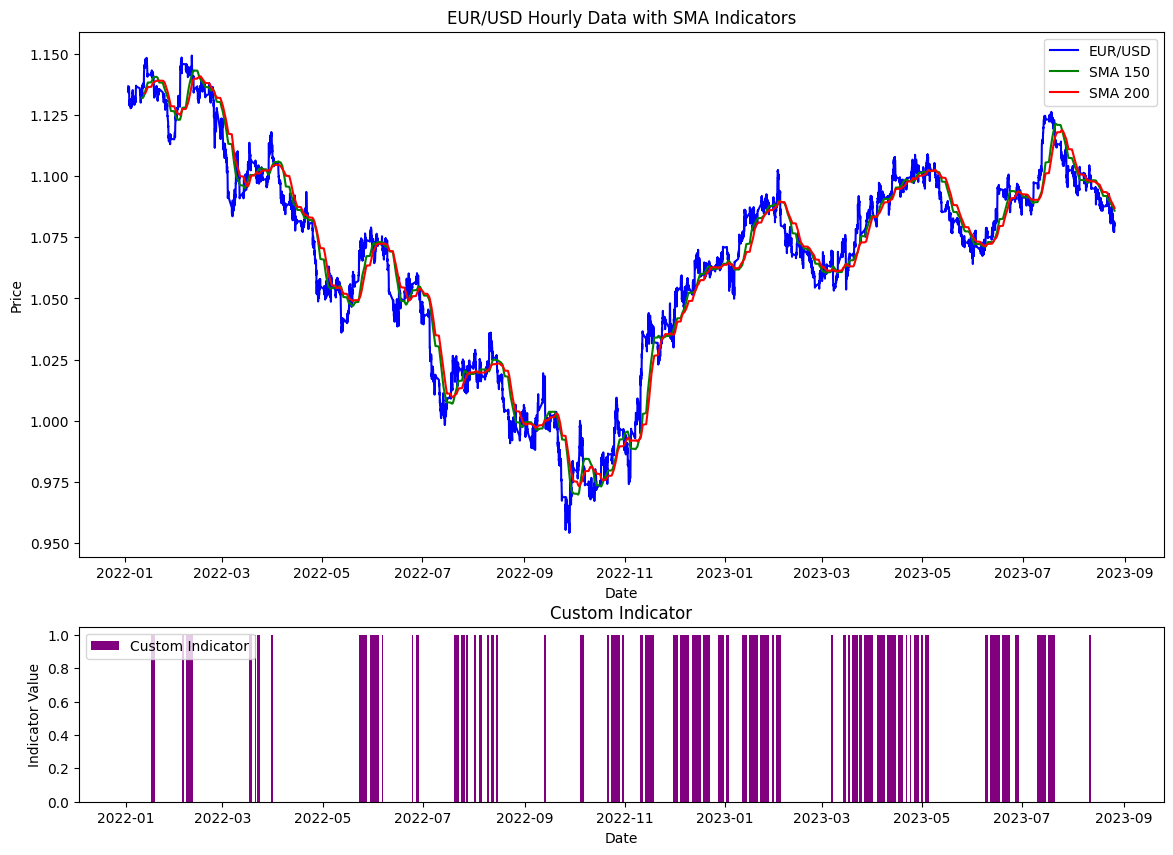

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Fetch EUR/USD hourly data from Yahoo Finance
symbol = "EURUSD=X"
start_date = "2022-01-01"
end_date = "2023-08-27"  # You can adjust this to the current date
interval = "1h"

data = yf.download(symbol, start=start_date, end=end_date, interval=interval)

# Compute SMA for 150 and 200 periods
data['SMA_150'] = data['Close'].rolling(window=150).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Compute Rate of Change for 240 and 120 periods
data['ROC_240'] = data['Close'].pct_change(periods=240) * 100
data['ROC_120'] = data['Close'].pct_change(periods=120) * 100

# Compute 5-period RSI
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=5).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=5).mean()
rs = gain / loss
data['RSI_5'] = 100 - (100 / (1 + rs))

# Compute custom indicator
data['Custom_Indicator'] = ((data['Close'] > data['SMA_150']) & 
                            (data['SMA_150'] > data['SMA_200']) & 
                            (data['ROC_240'] > 0) & 
                            (data['ROC_120'] > 0)).astype(int)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [3, 1]})

# Plot EUR/USD and SMAs
ax1.plot(data['Close'], label='EUR/USD', color='blue')
ax1.plot(data['SMA_150'], label='SMA 150', color='green')
ax1.plot(data['SMA_200'], label='SMA 200', color='red')
ax1.set_title('EUR/USD Hourly Data with SMA Indicators')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.legend()

# Plot Custom Indicator as a bar chart
ax2.bar(data.index, data['Custom_Indicator'], label='Custom Indicator', color='purple')
ax2.set_title('Custom Indicator')
ax2.set_xlabel('Date')
ax2.set_ylabel('Indicator Value')
ax2.legend()

plt.show()


[*********************100%***********************]  1 of 1 completed


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Initial Balance: 100000
Final Balance: 94091.16055280202
Total Return: -5.908839447197989 %


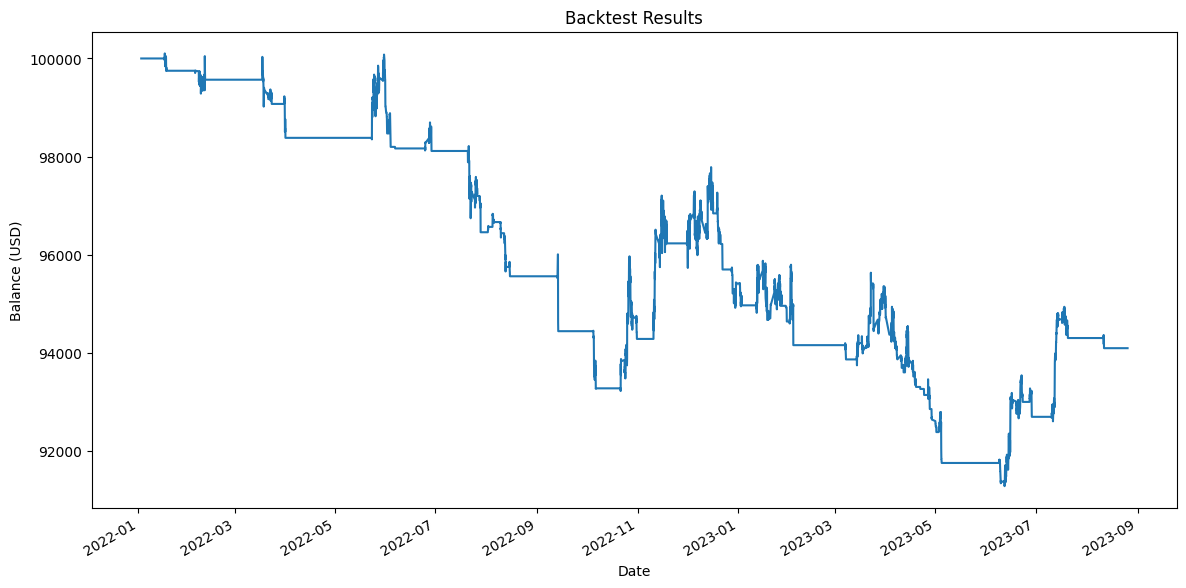

In [6]:
import yfinance as yf
import pandas as pd

# Fetch EUR/USD hourly data from Yahoo Finance
symbol = "EURUSD=X"
start_date = "2022-01-01"
end_date = "2023-08-27"  # You can adjust this to the current date
interval = "1h"

data = yf.download(symbol, start=start_date, end=end_date, interval=interval)

# Compute SMA for 150 and 200 periods
data['SMA_150'] = data['Close'].rolling(window=150).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Compute Rate of Change for 240 and 120 periods
data['ROC_240'] = data['Close'].pct_change(periods=240) * 100
data['ROC_120'] = data['Close'].pct_change(periods=120) * 100

# Compute custom indicator
data['Custom_Indicator'] = ((data['Close'] > data['SMA_150']) & 
                            (data['SMA_150'] > data['SMA_200']) & 
                            (data['ROC_240'] > 0) & 
                            (data['ROC_120'] > 0)).astype(int)

# Backtesting
initial_balance = 100000  # Initial investment amount in USD
balance = initial_balance
position = 0  # 0 means not invested, 1 means invested

# Create a DataFrame to store backtest results
backtest_data = pd.DataFrame(index=data.index)
backtest_data['Price'] = data['Close']
backtest_data['Signal'] = data['Custom_Indicator']
backtest_data['Balance'] = None

for i in range(len(backtest_data)):
    if backtest_data['Signal'].iloc[i] == 1:
        if position == 0:
            position = balance / backtest_data['Price'].iloc[i]
            balance = 0
    elif backtest_data['Signal'].iloc[i] == 0:
        if position != 0:
            balance = position * backtest_data['Price'].iloc[i]
            position = 0
    
    backtest_data['Balance'].iloc[i] = balance + position * backtest_data['Price'].iloc[i]

# Display backtest results
print("Initial Balance:", initial_balance)
print("Final Balance:", backtest_data['Balance'].iloc[-1])
print("Total Return:", (backtest_data['Balance'].iloc[-1] / initial_balance - 1) * 100, "%")

# Plotting the balance over time
backtest_data['Balance'].plot(figsize=(14, 7), title='Backtest Results')
plt.xlabel('Date')
plt.ylabel('Balance (USD)')
plt.show()


[*********************100%***********************]  1 of 1 completed


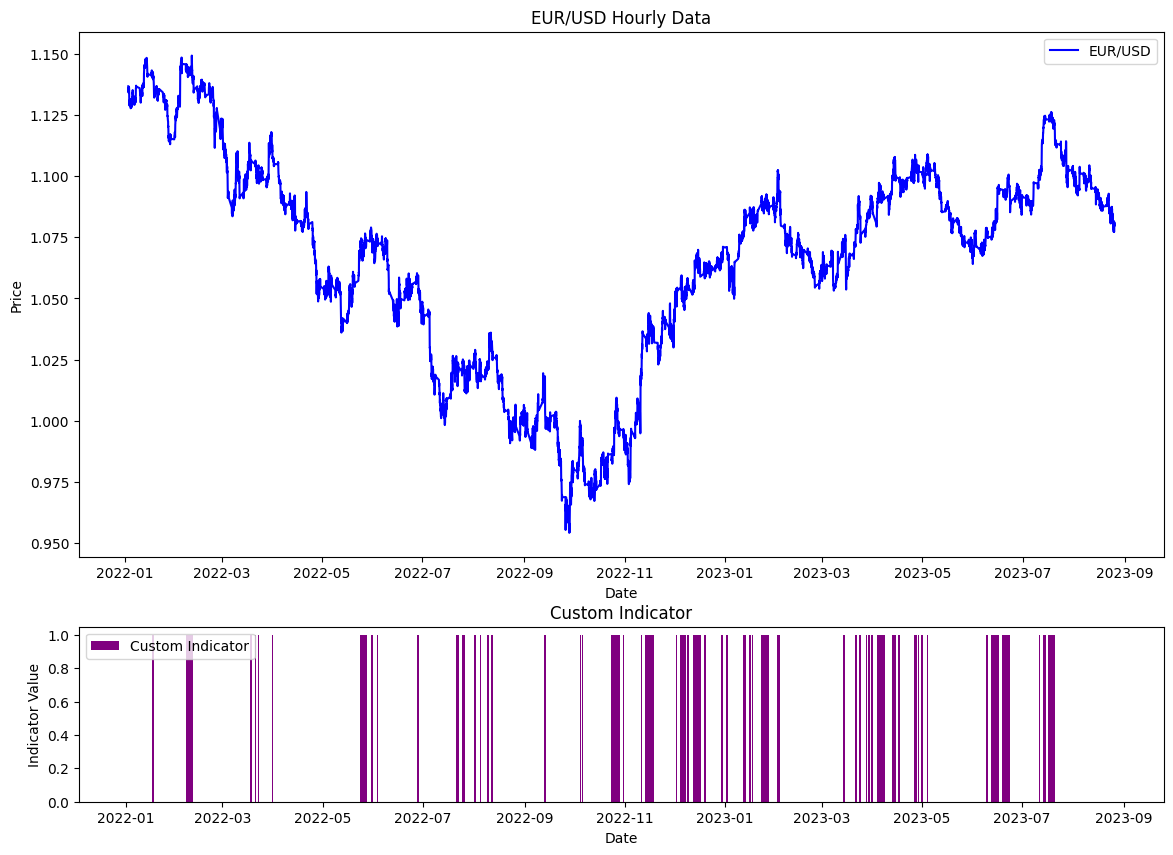

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Fetch EUR/USD hourly data from Yahoo Finance
symbol = "EURUSD=X"
start_date = "2022-01-01"
end_date = "2023-08-27"  # You can adjust this to the current date
interval = "1h"

data = yf.download(symbol, start=start_date, end=end_date, interval=interval)

# Compute SMA for 150 and 200 periods
data['SMA_150'] = data['Close'].rolling(window=150).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Compute Rate of Change for 240 and 120 periods
data['ROC_240'] = data['Close'].pct_change(periods=240) * 100
data['ROC_120'] = data['Close'].pct_change(periods=120) * 100

# Compute 5-period RSI
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=5).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=5).mean()
rs = gain / loss
data['RSI_5'] = 100 - (100 / (1 + rs))

# Compute custom indicator with new RSI condition
data['Custom_Indicator'] = ((data['Close'] > data['SMA_150']) & 
                            (data['SMA_150'] > data['SMA_200']) & 
                            (data['ROC_240'] > 0) & 
                            (data['ROC_120'] > 0) & 
                            (data['RSI_5'] < 25)).astype(int)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [3, 1]})

# Plot EUR/USD
ax1.plot(data['Close'], label='EUR/USD', color='blue')
ax1.set_title('EUR/USD Hourly Data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.legend()

# Plot Custom Indicator as a bar chart
ax2.bar(data.index, data['Custom_Indicator'], label='Custom Indicator', color='purple')
ax2.set_title('Custom Indicator')
ax2.set_xlabel('Date')
ax2.set_ylabel('Indicator Value')
ax2.legend()

plt.show()


[*********************100%***********************]  1 of 1 completed


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Initial Balance: 100000
Final Balance: 102167.82240285113
Total Return: 2.1678224028511384 %


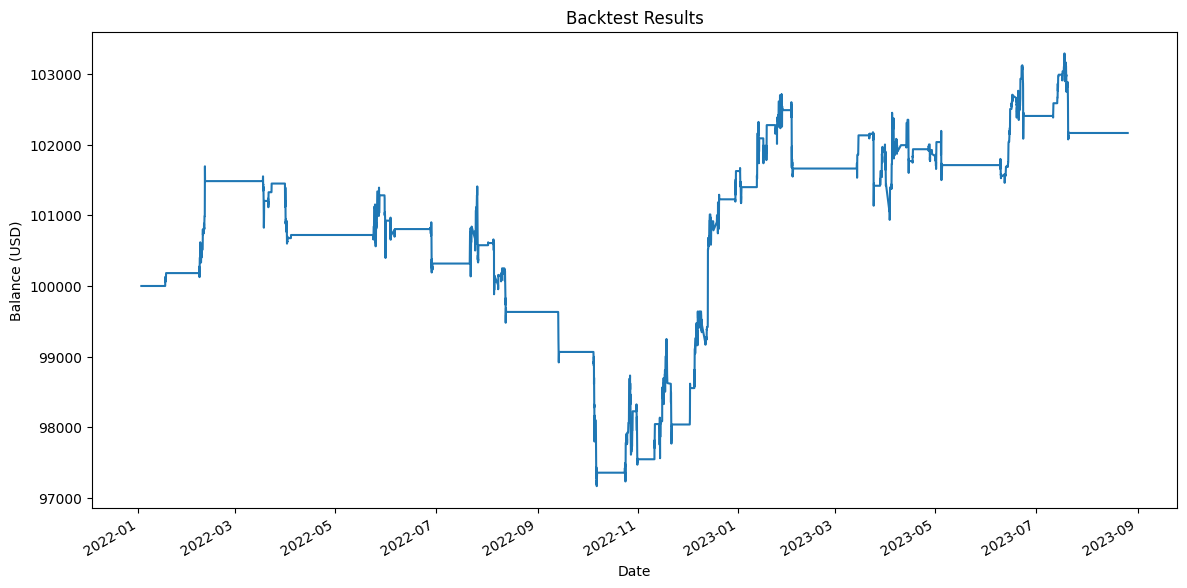

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch EUR/USD hourly data from Yahoo Finance
symbol = "EURUSD=X"
start_date = "2022-01-01"
end_date = "2023-08-27"  # You can adjust this to the current date
interval = "1h"

data = yf.download(symbol, start=start_date, end=end_date, interval=interval)

# Compute SMA for 150 and 200 periods
data['SMA_150'] = data['Close'].rolling(window=150).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Compute Rate of Change for 240 and 120 periods
data['ROC_240'] = data['Close'].pct_change(periods=240) * 100
data['ROC_120'] = data['Close'].pct_change(periods=120) * 100

# Compute 5-period RSI
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=5).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=5).mean()
rs = gain / loss
data['RSI_5'] = 100 - (100 / (1 + rs))

# Compute custom indicator
data['Custom_Indicator'] = ((data['Close'] > data['SMA_150']) & 
                            (data['SMA_150'] > data['SMA_200']) & 
                            (data['ROC_240'] > 0) & 
                            (data['ROC_120'] > 0) & 
                            (data['RSI_5'] < 25)).astype(int)

# Backtesting
initial_balance = 100000  # Initial investment amount in USD
balance = initial_balance
position = 0  # 0 means not invested, 1 means invested

# Create a DataFrame to store backtest results
backtest_data = pd.DataFrame(index=data.index)
backtest_data['Price'] = data['Close']
backtest_data['Signal'] = data['Custom_Indicator']
backtest_data['RSI_5'] = data['RSI_5']
backtest_data['Balance'] = None

for i in range(len(backtest_data)):
    if backtest_data['Signal'].iloc[i] == 1:
        if position == 0:
            position = balance / backtest_data['Price'].iloc[i]
            balance = 0
    elif backtest_data['RSI_5'].iloc[i] > 75:
        if position != 0:
            balance = position * backtest_data['Price'].iloc[i]
            position = 0
    
    backtest_data['Balance'].iloc[i] = balance + position * backtest_data['Price'].iloc[i]

# Display backtest results
print("Initial Balance:", initial_balance)
print("Final Balance:", backtest_data['Balance'].iloc[-1])
print("Total Return:", (backtest_data['Balance'].iloc[-1] / initial_balance - 1) * 100, "%")

# Plotting the balance over time
backtest_data['Balance'].plot(figsize=(14, 7), title='Backtest Results')
plt.xlabel('Date')
plt.ylabel('Balance (USD)')
plt.show()


[*********************100%***********************]  1 of 1 completed


C:\Users\mehdi\AppData\Local\Temp\ipykernel_12972\1849355905.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_data['Balance'].iloc[i] = balance + position * backtest_data['Price'].iloc[i]
C:\Users\mehdi\AppData\Local\Temp\ipykernel_12972\1849355905.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_data['Balance'].iloc[i] = balance + position * backtest_data['Price'].iloc[i]
C:\Users\mehdi\AppData\Local\Temp\ipykernel_12972\1849355905.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

Initial Balance: 100000
Final Balance: 92909.88375477826
Total Return: -7.090116245221745 %


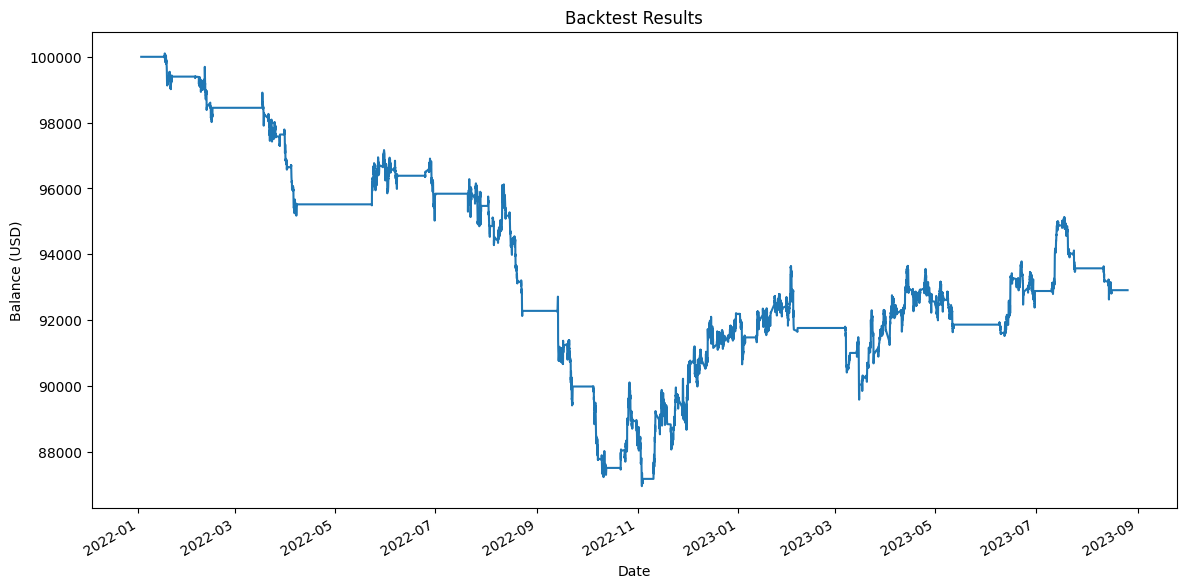

In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch EUR/USD hourly data from Yahoo Finance
symbol = "EURUSD=X"
start_date = "2022-01-01"
end_date = "2023-08-27"  # You can adjust this to the current date
interval = "1h"

data = yf.download(symbol, start=start_date, end=end_date, interval=interval)

# Compute SMA for 150 and 200 periods
data['SMA_150'] = data['Close'].rolling(window=150).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Compute Rate of Change for 240 and 120 periods
data['ROC_240'] = data['Close'].pct_change(periods=240) * 100
data['ROC_120'] = data['Close'].pct_change(periods=120) * 100

# Compute 5-period RSI
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=5).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=5).mean()
rs = gain / loss
data['RSI_5'] = 100 - (100 / (1 + rs))

# Compute custom indicator
data['Custom_Indicator'] = 0
data.loc[(data['Close'] > data['SMA_150']) & 
         (data['SMA_150'] > data['SMA_200']) & 
         (data['ROC_240'] > 0) & 
         (data['ROC_120'] > 0), 'Custom_Indicator'] = 1
data.loc[(data['SMA_150'] < data['SMA_200']) & 
         (data['Close'] < data['SMA_200']) & 
         (data['RSI_5'] > 75), 'Custom_Indicator'] = -1

# Backtesting
initial_balance = 100000  # Initial investment amount in USD
balance = initial_balance
position = 0  # 0 means not invested, 1 means invested

# Create a DataFrame to store backtest results
backtest_data = pd.DataFrame(index=data.index)
backtest_data['Price'] = data['Close']
backtest_data['Signal'] = data['Custom_Indicator']
backtest_data['Balance'] = None

for i in range(len(backtest_data)):
    if backtest_data['Signal'].iloc[i] == 1:
        if position == 0:
            position = balance / backtest_data['Price'].iloc[i]
            balance = 0
    elif backtest_data['Signal'].iloc[i] == -1:
        if position != 0:
            balance = position * backtest_data['Price'].iloc[i]
            position = 0
    
    backtest_data['Balance'].iloc[i] = balance + position * backtest_data['Price'].iloc[i]

# Display backtest results
print("Initial Balance:", initial_balance)
print("Final Balance:", backtest_data['Balance'].iloc[-1])
print("Total Return:", (backtest_data['Balance'].iloc[-1] / initial_balance - 1) * 100, "%")

# Plotting the balance over time
backtest_data['Balance'].plot(figsize=(14, 7), title='Backtest Results')
plt.xlabel('Date')
plt.ylabel('Balance (USD)')
plt.show()
